# DRILL: Improve this gradient boost model
While this model is already doing alright, we've seen from the Type I and Type II error rates that there is definitely room for improvement. Your task is to see how low you can get the error rates to go in the test set, based on your model in the training set. Strategies you might use include:

* Creating new features
* Applying more overfitting-prevention strategies like subsampling
* More iterations
* Trying a different loss function
* Changing the structure of the weak learner: Allowing more leaves in the tree, or other modifications

In [0]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import timeit
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [0]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

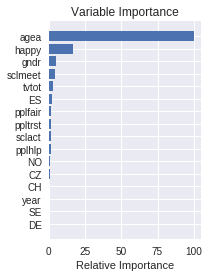

In [0]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [0]:
params = {'n_estimators': 50,
          'max_depth': 6,
          'subsample': 0.7,
          'min_weight_fraction_leaf': 0.2,
          'learning_rate': 0.08,
          'min_samples_split': 0.1,
          'loss': 'deviance'}

start_time = timeit.default_timer()

clf_B = ensemble.GradientBoostingClassifier(**params)
clf_B.fit(X_train, y_train)
print ("Runtime: %0.2f seconds" % (timeit.default_timer() - start_time))

predict_train_B = clf_B.predict(X_train)
predict_test_B = clf_B.predict(X_test)

score_train = clf_B.score(X_train, y_train)
score_test = clf_B.score(X_test, y_test)

B = clf_B.score(X_test, y_test)

accuracy_table(y_train, predict_train_B, y_test, predict_test_B)

Runtime: 0.25 seconds
Training set accuracy:
R-squared Score: 0.731860338243317
Percent Type I errors: 0.047872340425531915
Percent Type II errors: 0.22026732133115112

Test set accuracy:
R-squared Score: 0.7276073619631902
Percent Type I errors: 0.0687116564417178
Percent Type II errors: 0.20368098159509201


In [0]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

A = clf.score(X_test, y_test)

def accuracy_table(y_train, predict_train, y_test, predict_test):
    # Accuracy tables.
    table_train = pd.crosstab(y_train, predict_train, margins=True)
    table_test = pd.crosstab(y_test, predict_test, margins=True)

    train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
    train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

    test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
    test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

    print((
        'Training set accuracy:\n'
        'R-squared Score: {}\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}\n\n'
        'Test set accuracy:\n'
        'R-squared Score: {}\n'
        'Percent Type I errors: {}\n'
        'Percent Type II errors: {}'
    ).format(score_train, train_tI_errors, train_tII_errors, score_test, test_tI_errors, test_tII_errors))
accuracy_table(y_train, predict_train, y_test, predict_test)

Training set accuracy:
R-squared Score: 0.731860338243317
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R-squared Score: 0.7276073619631902
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [0]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [0]:
X_feature = X[['tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea']]

X_feat_train = X_feature[:offset]

X_feat_test = X_feature[offset:]


clf_C = ensemble.GradientBoostingClassifier(**params)
clf_C.fit(X_train, y_train)
print ("Runtime: %0.2f seconds" % (timeit.default_timer() - start_time))

predict_train_C = clf_C.predict(X_train)
predict_test_C = clf_C.predict(X_test)

score_train = clf_C.score(X_train, y_train)
score_test = clf_C.score(X_test, y_test)

C = clf_C.score(X_test, y_test)

accuracy_table(y_train, predict_train_C, y_test, predict_test_C)

Runtime: 3.65 seconds
Training set accuracy:
R-squared Score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R-squared Score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [0]:
X_feature['ppl'] = X_feature['ppltrst'] * X_feature['pplfair'] * X_feature['pplhlp']

X_feat_train = X_feature[:offset]

X_feat_test = X_feature[offset:]


clf_D = ensemble.GradientBoostingClassifier(**params)
clf_D.fit(X_train, y_train)
print ("Runtime: %0.2f seconds" % (timeit.default_timer() - start_time))

predict_train_D = clf_D.predict(X_train)
predict_test_D = clf_D.predict(X_test)

score_train = clf_D.score(X_train, y_train)
score_test = clf_D.score(X_test, y_test)

D = clf_D.score(X_test, y_test)

accuracy_table(y_train, predict_train_D, y_test, predict_test_D)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Runtime: 5.53 seconds
Training set accuracy:
R-squared Score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R-squared Score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [0]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

X_pca_train = X_pca[:offset]

X_pca_test = X_pca[offset:]

clf_E = ensemble.GradientBoostingClassifier(**params)
clf_E.fit(X_train, y_train)
print ("Runtime: %0.2f seconds" % (timeit.default_timer() - start_time))

predict_train_E = clf_E.predict(X_train)
predict_test_E = clf_E.predict(X_test)

score_train = clf_E.score(X_train, y_train)
score_test = clf_E.score(X_test, y_test)

E = clf_E.score(X_test, y_test)

accuracy_table(y_train, predict_train_E, y_test, predict_test_E)

Runtime: 7.43 seconds
Training set accuracy:
R-squared Score: 0.7774140752864157
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
R-squared Score: 0.7521472392638037
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


In [0]:
print('A = ', A)
print('B = ', B)
print('C = ', C)
print('D = ', D)
print('E = ', E)

A =  0.7521472392638037
B =  0.7276073619631902
C =  0.7521472392638037
D =  0.7521472392638037
E =  0.7521472392638037
